### Proyecto II

Consigna:

En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

-Detección y eliminación de Outliers
-Encoding
-Imputación de valores faltantes
-Escalado de datos
-Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

In [99]:
#Obs! Teniendo en cuenta que en el primer proyecto realizamos todo el EDA, vamos a solamente enfocarnos en lo que nos interesa para este 2do proyecto a fines prácticos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pr = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

print(pr.shape) #146660 filas, 19 columnas

pr.head() 


(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
pr.isna() #Para detectar los valores que faltan... 

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
print('La cantidad de valores que faltan en la columna 1 es:', pr.start_date.isna().sum())
print('La cantidad de valores que faltan en la columna 2 es:', pr.end_date.isna().sum())
print('La cantidad de valores que faltan en la columna 3 es:', pr.created_on.isna().sum())
print('La cantidad de valores que faltan en la columna 4 es:', pr.lat.isna().sum())
print('La cantidad de valores que faltan en la columna 5 es:', pr.lon.isna().sum())
print('La cantidad de valores que faltan en la columna 6 es:', pr.l1.isna().sum())
print('La cantidad de valores que faltan en la columna 7 es:', pr.l2.isna().sum())
print('La cantidad de valores que faltan en la columna 8 es:', pr.l3.isna().sum())
print('La cantidad de valores que faltan en la columna 9 es:', pr.rooms.isna().sum())
print('La cantidad de valores que faltan en la columna 10 es:', pr.bedrooms.isna().sum())
print('La cantidad de valores que faltan en la columna 11 es:', pr.bathrooms.isna().sum())
print('La cantidad de valores que faltan en la columna 12 es:', pr.surface_total.isna().sum())
print('La cantidad de valores que faltan en la columna 13 es:', pr.surface_covered.isna().sum())
print('La cantidad de valores que faltan en la columna 14 es:', pr.price.isna().sum())
print('La cantidad de valores que faltan en la columna 15 es:', pr.currency.isna().sum())
print('La cantidad de valores que faltan en la columna 16 es:', pr.title.isna().sum())
print('La cantidad de valores que faltan en la columna 17 es:', pr.description.isna().sum())
print('La cantidad de valores que faltan en la columna 18 es:', pr.property_type.isna().sum())
print('La cantidad de valores que faltan en la columna 19 es:', pr.operation_type.isna().sum())

La cantidad de valores que faltan en la columna 1 es: 0
La cantidad de valores que faltan en la columna 2 es: 0
La cantidad de valores que faltan en la columna 3 es: 0
La cantidad de valores que faltan en la columna 4 es: 9925
La cantidad de valores que faltan en la columna 5 es: 9959
La cantidad de valores que faltan en la columna 6 es: 0
La cantidad de valores que faltan en la columna 7 es: 0
La cantidad de valores que faltan en la columna 8 es: 0
La cantidad de valores que faltan en la columna 9 es: 0
La cantidad de valores que faltan en la columna 10 es: 0
La cantidad de valores que faltan en la columna 11 es: 5957
La cantidad de valores que faltan en la columna 12 es: 20527
La cantidad de valores que faltan en la columna 13 es: 21614
La cantidad de valores que faltan en la columna 14 es: 0
La cantidad de valores que faltan en la columna 15 es: 0
La cantidad de valores que faltan en la columna 16 es: 0
La cantidad de valores que faltan en la columna 17 es: 0
La cantidad de valores 

In [5]:
def missing_values():
    temp_dict = dict()
    for i in pr.columns:
        if pr[i].isnull().sum() > 0: 
            temp_dict[i] = pr[i].isnull().sum()
    return temp_dict

In [6]:
missing_values()

{'lat': 9925,
 'lon': 9959,
 'bathrooms': 5957,
 'surface_total': 20527,
 'surface_covered': 21614}

In [7]:
#Estudiamos la correlación entre las variables
pr.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.975578,-0.010933,0.007618,0.019923,-0.019598,-0.004156,0.013393
lon,-0.975578,1.000000,-0.006931,-0.016905,-0.028612,-0.049097,-0.014388,0.009368
rooms,-0.010933,-0.006931,1.000000,0.869769,0.613308,0.081044,0.075012,0.351025
bedrooms,0.007618,-0.016905,0.869769,1.000000,0.588527,0.079229,0.072627,0.316192
bathrooms,0.019923,-0.028612,0.613308,0.588527,1.000000,0.061159,0.069361,0.556861
surface_total,-0.019598,-0.049097,0.081044,0.079229,0.061159,1.000000,0.430887,0.038727
surface_covered,-0.004156,-0.014388,0.075012,0.072627,0.069361,0.430887,1.000000,0.049136
price,0.013393,0.009368,0.351025,0.316192,0.556861,0.038727,0.049136,1.000000


In [3]:
#Lat y lon no nos sirven porque vemos que no tienen correlacion significativa con el precio. Entonces, las eliminamos

del(pr['lat'])

In [4]:
del(pr['lon'])

In [6]:
#Seguimos viendo como son las columnas del dataset para ver aquellas que más nos importan, filtrarlo y luego continuar el trabajo con los valores faltantes.


Text(0.5, 1.0, 'Propiedades según Región')

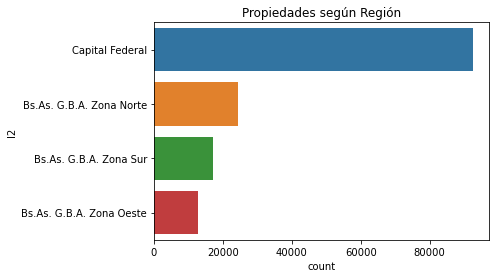

In [5]:
sns.countplot(y = 'l2', data = pr, order = pr['l2'].value_counts().index) #Ver con Seaborn es más fácil!
plt.title('Propiedades según Región')
#Decidimos elegir las 4 regiones, a diferencia del proyecto pasado que solo habiamos elegido Capital Federal

Text(0.5, 1.0, 'País')

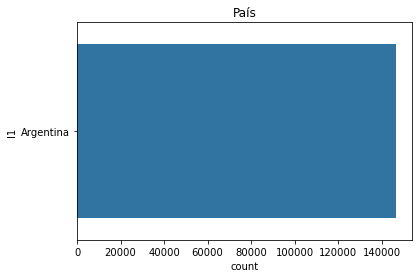

In [7]:
sns.countplot(y = 'l1', data = pr, order = pr['l1'].value_counts().index) #Ver con Seaborn es más fácil!
plt.title('País')
#Son todos de Argentina, con lo cual esta Col no nos interesa!

In [6]:
del(pr['l1'])

Text(0.5, 1.0, 'Divisa')

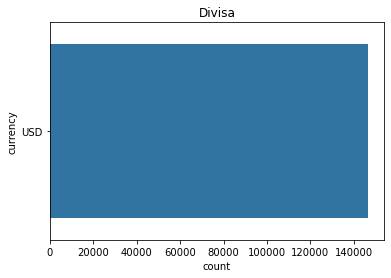

In [23]:
sns.countplot(y = 'currency', data = pr, order = pr['currency'].value_counts().index) 
plt.title('Divisa')
#Son todos en USD, con lo cual esta Col no nos interesa

Text(0.5, 1.0, 'Tipo de Operación')

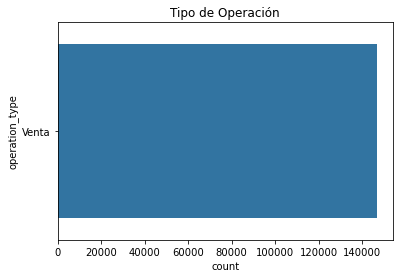

In [9]:
sns.countplot(y = 'operation_type', data = pr, order = pr['operation_type'].value_counts().index) 
plt.title('Tipo de Operación')
#Son todas Ventas, con lo cual esta Col no nos interesa

In [7]:
pr1 = pr.drop(['start_date', 'end_date', 'created_on', 'currency', 'description', 'operation_type'], axis=1, inplace = True)

In [8]:
pr.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,58 entre 1 y 2 Venta de departamento en ph.1 ...,PH


In [ ]:
#Nos quedamos con tipos de propiedad: CASA, DPTO Y PH ya que sabemos que son los mas abundantes, haciendo parecer a los otros tipos, insignificantes

In [9]:
casa = pr['property_type'] == 'Casa' #Hacemos distintas mascaras sobre el dataframe de CAPFED
dpto = pr['property_type'] == 'Departamento'
ph = pr['property_type'] == 'PH'

In [10]:
df2 = pr[casa] #Armo un df de cada mascara para luego unirlos 
df3 = pr[dpto]
df4 = pr[ph]



In [11]:
df = pd.concat([df2, df3, df4])

### Parte A

#### Vamos a trabajar con Valores Faltantes

In [12]:
#Volvemos a contar los valores faltantes con estas modificaciones

def missing_values1():
    temp_dict = dict()
    for i in df.columns:
        if df[i].isnull().sum() > 0: 
            temp_dict[i] = df[i].isnull().sum()
    return temp_dict

In [17]:
missing_values1()

{'bathrooms': 4211, 'surface_total': 18623, 'surface_covered': 18909}

In [18]:
#En cuanto a bathrooms: 
#Vemos la distribución
print(df["bathrooms"].describe())

print('La mediana es', df.bathrooms.median())

#Decidimos imputar por la mediana, esta decision se tomo de esta manera ya que sabemos que no es una distribucion normal ni centrada.
#Asi mismo, sabemos que hasta el 75% de los datos, la mayor cantidad de baños es 2 y que el 50% de los datos concentra 1 baño. 
#Tomamos esta decisión ya que si imputamos por mean, tendríamos que dejar un numero entero (no puede hacer 1.60 baños en una propiedad), con lo cual
#al hacer redondeo, quedaría en 2 baños...

count    138934.000000
mean          1.597715
std           0.885980
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: bathrooms, dtype: float64
La mediana es 1.0


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

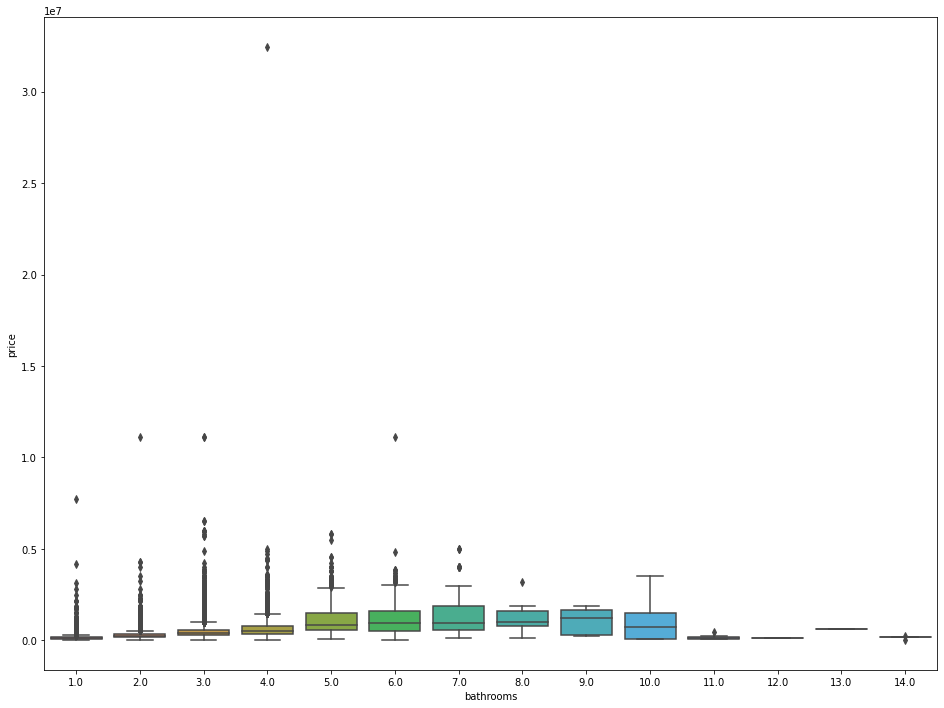

In [17]:
plt.figure(figsize=(16, 12))
sns.boxplot(x="bathrooms", y="price", data=pr)

In [19]:
#En cuanto a superficie: 
#Vemos la distribución
df["surface_total"].describe()

count    124522.000000
mean        182.381089
std        1436.708405
min          10.000000
25%          52.000000
50%          78.000000
75%         138.000000
max      169000.000000
Name: surface_total, dtype: float64

In [21]:
df["surface_covered"].describe()

count    124236.000000
mean        112.374159
std         919.025616
min           1.000000
25%          47.000000
50%          68.000000
75%         108.000000
max      126062.000000
Name: surface_covered, dtype: float64

In [ ]:
#Imputamos los valores faltantes en baños y en superficie por la mediana, porque no son distrib normales, y además porque vemos que tiene valores mas coherentes

In [13]:
df.bathrooms.fillna(df.bathrooms.median(), inplace = True)


In [14]:
df["bathrooms"].describe()

count    143145.000000
mean          1.580132
std           0.878675
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: bathrooms, dtype: float64

In [ ]:
#Vemos que despues de la imputación no cambia la distribución

In [24]:
missing_values1()

{'surface_total': 18623, 'surface_covered': 18909}

In [ ]:
#Siguiendo el mismo razonamiento, y viendo que hay valores atipicos, creemos que la mejor decision no es imputar por la media, sino por la mediana 
#Asi mismo tenemos en cuenta que tenemos outliers, y una "distribución rara" imutamos por la mediana. 

In [15]:
df.surface_covered.fillna(df.surface_covered.median(), inplace = True)
df.surface_total.fillna(df.surface_total.median(), inplace = True)

In [16]:
df1 = df['surface_covered'] <= df['surface_total']  #Eliminamos aquellas cuya sup cubierta sea mayor a la total (no tiene coherencia)

print(df1.value_counts())

df = df[df1]

True     141113
False      2032
dtype: int64


#### Trabajamos con outliers

In [ ]:
#Acá en primer lugar intentamos hacerlo con el criterio de las 3 sigmas y no funciono, lo mismo ocurrió con el rango intercuartilico, ya que nos dejaba
#valores negativos (ej. mínimos) que no tenian coherencia, y eso vimos que se relacionaba con la distribución anormal.

#Buscamos otras técnicas para detectar outliers

In [ ]:
#Vamos a graficar la superficie total y como se comporta el precio en relación a la superficie

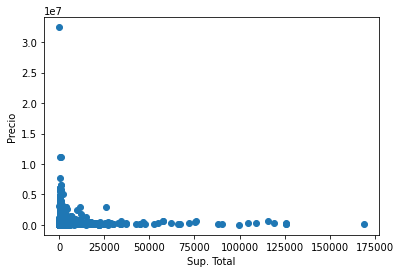

In [28]:
plt.scatter(df["surface_total"], df["price"])
plt.xlabel("Sup. Total")
plt.ylabel("Precio")
plt.show()

In [29]:
df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,141113.000000,141113.000000,141113.000000,141113.000000,141113.000000,1.411130e+05
mean,3.089609,1.994104,1.579330,169.547859,98.792422,2.381418e+05
std,1.378654,1.120709,0.876066,1349.599775,686.970829,2.862867e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,55.000000,49.000000,1.125000e+05
50%,3.000000,2.000000,1.000000,78.000000,68.000000,1.669000e+05
75%,4.000000,3.000000,2.000000,122.000000,98.000000,2.650000e+05
max,35.000000,15.000000,14.000000,169000.000000,126062.000000,3.243423e+07


In [17]:
#DEscartamos a los puntos que nos parecen un poco alejados
drop_index_list = df[df['surface_total'] > 79000].index.tolist()
df.drop(drop_index_list, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


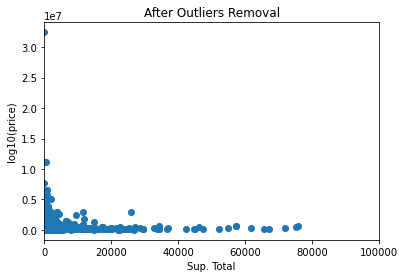

In [31]:
# Ploteamos nuevamente, luego de eliminar los valores. 

plt.scatter(df["surface_total"], df["price"])
plt.title("After Outliers Removal")
plt.xlabel("Sup. Total")
plt.ylabel("log10(price)")
plt.xlim(0, 100000)
plt.show()

In [ ]:
#Arriba en el precio vemos que también ocurre algo similar

In [18]:
drop_index_list2 = df[df['price'] > 3000000].index.tolist()
df.drop(drop_index_list2, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


In [33]:
df[df.surface_covered > 40000]


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
1065,Bs.As. G.B.A. Zona Norte,Escobar,5.0,4.0,1.0,75792.0,75792.0,580000.0,Casa Puertos del Lago Muelles en construcción,Casa
69011,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,1.0,54750.0,54750.0,270000.0,DUEO VENDE CASA,Casa
90178,Bs.As. G.B.A. Zona Sur,Ezeiza,4.0,3.0,3.0,44910.0,44910.0,165000.0,EXCELENTE CASA EN VENTA C/ PILETA EN CANNING,Casa
42655,Capital Federal,Almagro,3.0,2.0,1.0,47360.0,47360.0,116000.0,Venta Almagro Departamento 3 ambientes luminoso,Departamento


In [62]:
#Ninuna de estas propiedades tiene sentido!!! Una casa en Caballito no puede tener 126062 m2, es imposible, teniendo en cuenta que es un PH con 5 ambientes
#Decidimos dejar la descripcion para poder chequear este tipo de cosas!

In [19]:
# tiramos a los puntos que nos parecen un poco alejados
drop_index_list = df[df['surface_total'] > 40000].index.tolist()
df.drop(drop_index_list, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


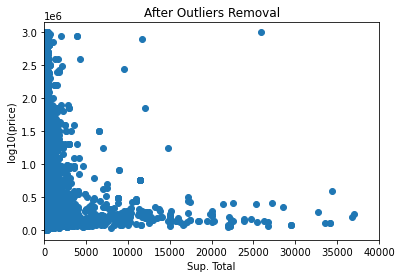

In [35]:
# Volvemos a graficar para ver como quedó...

plt.scatter(df["surface_total"], df["price"])
plt.title("After Outliers Removal")
plt.xlabel("Sup. Total")
plt.ylabel("log10(price)")
plt.xlim(0, 40000)
plt.show()

In [69]:
#Queremos ver las propiedades que tienen superficie cubierta mayor a 10.000

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
3146,Bs.As. G.B.A. Zona Norte,Vicente López,5.0,3.0,1.0,22042.0,13412.0,209000.0,TIPO CASA VILLA ADELINA TRIPLEX CON JARDÍN,Casa
20090,Bs.As. G.B.A. Zona Oeste,Morón,5.0,3.0,2.0,17388.0,10195.0,152000.0,Excelente PH 6 ambientes en 3 plantas con garage,Casa
37308,Bs.As. G.B.A. Zona Oeste,Moreno,3.0,2.0,1.0,29520.0,29520.0,75000.0,Casa en Moreno,Casa
46638,Bs.As. G.B.A. Zona Oeste,Moreno,3.0,2.0,1.0,29520.0,29520.0,75000.0,Casa en Moreno,Casa
48748,Bs.As. G.B.A. Zona Oeste,Morón,3.0,2.0,1.0,20265.0,11848.0,145000.0,VENTA CASA 3 AMBIENTES CASTELAR SUR C/ COCHERA,Casa
50287,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,15015.0,15015.0,210000.0,Venta casa / Barrio La Cañada de Pilar Los Robles,Casa
74491,Bs.As. G.B.A. Zona Oeste,Moreno,3.0,2.0,1.0,29520.0,29520.0,75000.0,Casa en Moreno,Casa
96231,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,15015.0,15015.0,210000.0,Venta casa / Barrio La Cañada de Pilar Los Robles,Casa
96237,Bs.As. G.B.A. Zona Oeste,Morón,5.0,3.0,2.0,17388.0,10195.0,152000.0,Excelente PH 6 ambientes en 3 plantas con garage,Casa
13200,Capital Federal,Belgrano,4.0,3.0,2.0,11626.0,10509.0,285000.0,Semipiso de 4 amb. c/dependencia Belgrano R,Departamento


In [20]:
# Los elimiamos ya que analizamos que no tienen coherencia
drop_index_list = df[df['surface_total'] > 10000].index.tolist()
df.drop(drop_index_list, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


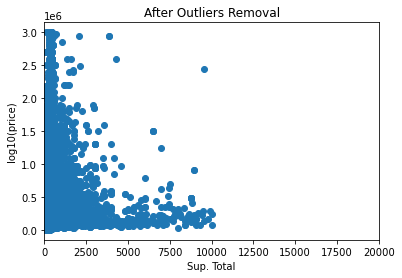

In [37]:
# Again plottng the Sup-Price graph after the outlier removal

plt.scatter(df["surface_total"], df["price"])
plt.title("After Outliers Removal")
plt.xlabel("Sup. Total")
plt.ylabel("log10(price)")
plt.xlim(0, 20000)
plt.show()

In [29]:
#Eliminamos los outliers de arriba!(Los 3)

In [21]:
#Siguiendo esta linea de análisis, buscamos los datos más concentrados... Teniendo en cuenta la descripcion  media y mediana:
drop_index_list3 = df[df['price'] > 1000000].index.tolist()
df.drop(drop_index_list3, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


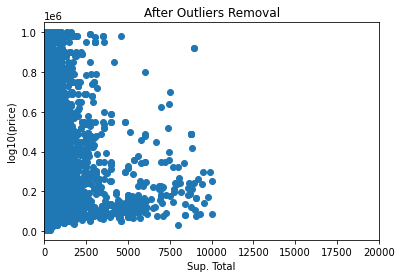

In [39]:
plt.scatter(df["surface_total"], df["price"])
plt.title("After Outliers Removal")
plt.xlabel("Sup. Total")
plt.ylabel("log10(price)")
plt.xlim(0, 20000)
plt.show()

In [90]:
del(df['Datos_Reescalados'])

In [40]:
df.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.867320,0.588229,0.299355,0.281094,0.527517
bedrooms,0.867320,1.000000,0.560760,0.271912,0.262345,0.494373
bathrooms,0.588229,0.560760,1.000000,0.232456,0.224147,0.638311
surface_total,0.299355,0.271912,0.232456,1.000000,0.623767,0.180542
surface_covered,0.281094,0.262345,0.224147,0.623767,1.000000,0.230397
price,0.527517,0.494373,0.638311,0.180542,0.230397,1.000000


In [22]:
# Continuamos eliminando
drop_index_list4 = df[df['surface_total'] > 5000].index.tolist()
df.drop(drop_index_list4, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


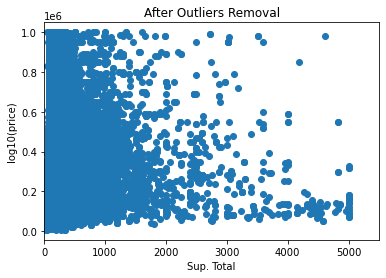

In [42]:
plt.scatter(df["surface_total"], df["price"])
plt.title("After Outliers Removal")
plt.xlabel("Sup. Total")
plt.ylabel("log10(price)")
plt.xlim(0, 5500)
plt.show()

In [43]:
df.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.867852,0.587720,0.385877,0.474757,0.527691
bedrooms,0.867852,1.000000,0.559933,0.354272,0.449935,0.494102
bathrooms,0.587720,0.559933,1.000000,0.300607,0.390545,0.638317
surface_total,0.385877,0.354272,0.300607,1.000000,0.605539,0.240775
surface_covered,0.474757,0.449935,0.390545,0.605539,1.000000,0.395632
price,0.527691,0.494102,0.638317,0.240775,0.395632,1.000000


In [ ]:
#Vemos los valores mayores a 2.000

In [43]:
df[df.surface_covered > 2000]

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
1974,Bs.As. G.B.A. Zona Norte,Pilar,6.0,5.0,5.0,2973.0,2973.0,750000.0,"IMPONENTE Casa 6 amb, 5 hab en suite.Mapuche P...",Casa
62535,Bs.As. G.B.A. Zona Sur,San Vicente,1.0,1.0,1.0,3100.0,3100.0,78600.0,Fracción de 3100 m2 con Quincho y Pileta,Casa
68094,Bs.As. G.B.A. Zona Sur,San Vicente,1.0,1.0,1.0,3100.0,3100.0,78600.0,Fracción de 3100 m2 con Quincho y Pileta,Casa
68095,Bs.As. G.B.A. Zona Sur,San Vicente,1.0,1.0,1.0,3100.0,3100.0,78600.0,Fracción de 3100 m2 con Quincho y Pileta,Casa
119084,Bs.As. G.B.A. Zona Norte,Pilar,6.0,5.0,5.0,2973.0,2973.0,750000.0,"IMPONENTE Casa 6 amb, 5 hab en suite.Mapuche P...",Casa
2977,Capital Federal,Balvanera,2.0,1.0,1.0,2760.0,2760.0,52000.0,VENTA DEPARTAMENTO 2 AMBIENTES,Departamento
8547,Capital Federal,Monserrat,2.0,1.0,1.0,3647.0,3040.0,153000.0,VENTA DEPARTAMENTO 2 AMB DUPLEX - MONSERRAT,Departamento
8549,Capital Federal,Monserrat,1.0,1.0,1.0,3337.0,3027.0,68600.0,VENTA MONOAMBIENTES - APTO PROFESIONAL- MONSERRAT,Departamento
9691,Capital Federal,Caballito,1.0,1.0,1.0,4500.0,3597.0,114750.0,"Caballito. Departamento 1 Ambiente, Venta en Pozo",Departamento
9692,Capital Federal,Caballito,1.0,1.0,1.0,4240.0,3588.0,107696.0,"Caballito. Departamento 1 Ambiente, Venta en Pozo",Departamento


In [47]:
#No tienen sentido, es decir, como son todos deptos y PH, no pueden tener esa cantidad de metros, salvo que se trate de un edificio entero (no es el caso)
#Por último eliminamos estas instancias

In [23]:
drop_index_list4 = df[df['surface_total'] > 2000].index.tolist()
df.drop(drop_index_list4, inplace=True)

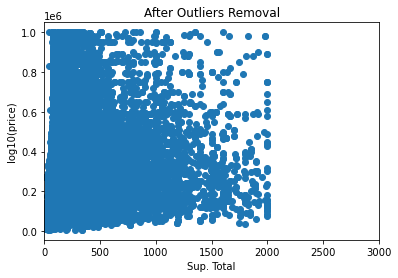

In [45]:
plt.scatter(df["surface_total"], df["price"])
plt.title("After Outliers Removal")
plt.xlabel("Sup. Total")
plt.ylabel("log10(price)")
plt.xlim(0, 3000)
plt.show()

In [46]:
df.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.867432,0.585076,0.487405,0.653887,0.526375
bedrooms,0.867432,1.000000,0.557310,0.446997,0.617738,0.492754
bathrooms,0.585076,0.557310,1.000000,0.371048,0.530921,0.637059
surface_total,0.487405,0.446997,0.371048,1.000000,0.696821,0.311441
surface_covered,0.653887,0.617738,0.530921,0.696821,1.000000,0.544441
price,0.526375,0.492754,0.637059,0.311441,0.544441,1.000000


In [179]:
#Vemos que logramos aumentar la correlación entre nuestras superficies y el precio de las propiedades.
#Tambien estuvimos viendo las propiedades entre 1.000 y 2.000 m2 de superficie, y tenian sentido (muchas eran casas-quintas, etc)

#### Vamos a probar escalar los datos. 

In [ ]:
#Sabemos que en los datasets solemos tener distintas variables, medidas en diferentes unidades 
#Cuando estandarizamos - ya no importa en qué unidades está medida una variable. Si las alturas estaban medidas en centímetros o metros (en este caso por ejemplo las superficies)
#luego del escalado ambas tendrán la misma distribución. Además, nos permite comparar variables de distinto tipo.

In [ ]:
#Reescalamos todas las variables numericas

In [24]:
#De la superficie Total

valor_medio = df.surface_total.mean()
std = df.surface_total.std()
df['Datos_Reescalados'] = (df.surface_total - valor_medio)/std
df.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type,Datos_Reescalados
137,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,79.0,219000.0,Venta Duplex super luminoso y comodo en Sender...,Casa,-0.204094
138,Bs.As. G.B.A. Zona Oeste,Ituzaingó,3.0,2.0,1.0,292.0,90.0,110000.0,CASA 3 AMBIENTES SOBRE LOTE 10 X 20,Casa,1.055179
252,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,"12 entre 485 y 486.Casa en venta, Villa Castel...",Casa,1.259889
253,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,18 entre 491 y 491bis - Casa en Venta en Gonnet,Casa,5.589802
254,Bs.As. G.B.A. Zona Norte,San Isidro,6.0,3.0,3.0,1000.0,190.0,370000.0,Venta Casa en San Isidro G.B.A. Zona Norte ABR...,Casa,5.447126


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


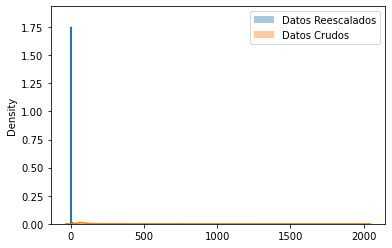

In [48]:
sns.distplot(df.Datos_Reescalados.values, label = 'Datos Reescalados')
sns.distplot(df.surface_total.values, label = 'Datos Crudos')
plt.legend()
plt.show()

In [25]:
#De la superficie Cubierta

valor_medio = df.surface_covered.mean()
std = df.surface_covered.std()
df['surface_covered_R'] = (df.surface_covered - valor_medio)/std
df.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type,Datos_Reescalados,surface_covered_R
137,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,79.0,219000.0,Venta Duplex super luminoso y comodo en Sender...,Casa,-0.204094,-0.079608
138,Bs.As. G.B.A. Zona Oeste,Ituzaingó,3.0,2.0,1.0,292.0,90.0,110000.0,CASA 3 AMBIENTES SOBRE LOTE 10 X 20,Casa,1.055179,0.092215
252,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,"12 entre 485 y 486.Casa en venta, Villa Castel...",Casa,1.259889,3.762986
253,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,18 entre 491 y 491bis - Casa en Venta en Gonnet,Casa,5.589802,4.309697
254,Bs.As. G.B.A. Zona Norte,San Isidro,6.0,3.0,3.0,1000.0,190.0,370000.0,Venta Casa en San Isidro G.B.A. Zona Norte ABR...,Casa,5.447126,1.654246


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


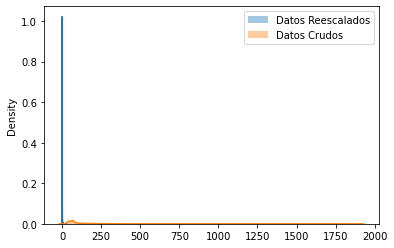

In [50]:
sns.distplot(df.surface_covered_R.values, label = 'Datos Reescalados')
sns.distplot(df.surface_covered.values, label = 'Datos Crudos')
plt.legend()
plt.show()

In [26]:
#De baños

valor_medio = df.bathrooms.mean()
std = df.bathrooms.std()
df['bathrooms_R'] = (df.bathrooms - valor_medio)/std
df.head()

valor_medio1 = df.rooms.mean()
std1 = df.rooms.std()
df['rooms_R'] = (df.rooms - valor_medio1)/std1
df.head()

valor_medio2 = df.bedrooms.mean()
std2 = df.bedrooms.std()
df['bedrooms_R'] = (df.bedrooms - valor_medio2)/std2
df.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type,Datos_Reescalados,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R
137,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,79.0,219000.0,Venta Duplex super luminoso y comodo en Sender...,Casa,-0.204094,-0.079608,0.573044,-0.032344,0.034482
138,Bs.As. G.B.A. Zona Oeste,Ituzaingó,3.0,2.0,1.0,292.0,90.0,110000.0,CASA 3 AMBIENTES SOBRE LOTE 10 X 20,Casa,1.055179,0.092215,-0.661412,-0.032344,0.034482
252,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,"12 entre 485 y 486.Casa en venta, Villa Castel...",Casa,1.259889,3.762986,0.573044,2.975885,0.944297
253,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,18 entre 491 y 491bis - Casa en Venta en Gonnet,Casa,5.589802,4.309697,1.807499,2.975885,0.944297
254,Bs.As. G.B.A. Zona Norte,San Isidro,6.0,3.0,3.0,1000.0,190.0,370000.0,Venta Casa en San Isidro G.B.A. Zona Norte ABR...,Casa,5.447126,1.654246,1.807499,2.223827,0.944297


In [27]:
df.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Datos_Reescalados,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R
rooms,1.000000,0.867432,0.585076,0.487405,0.653887,0.526375,0.487405,0.653887,0.585076,1.000000,0.867432
bedrooms,0.867432,1.000000,0.557310,0.446997,0.617738,0.492754,0.446997,0.617738,0.557310,0.867432,1.000000
bathrooms,0.585076,0.557310,1.000000,0.371048,0.530921,0.637059,0.371048,0.530921,1.000000,0.585076,0.557310
surface_total,0.487405,0.446997,0.371048,1.000000,0.696821,0.311441,1.000000,0.696821,0.371048,0.487405,0.446997
surface_covered,0.653887,0.617738,0.530921,0.696821,1.000000,0.544441,0.696821,1.000000,0.530921,0.653887,0.617738
price,0.526375,0.492754,0.637059,0.311441,0.544441,1.000000,0.311441,0.544441,0.637059,0.526375,0.492754
Datos_Reescalados,0.487405,0.446997,0.371048,1.000000,0.696821,0.311441,1.000000,0.696821,0.371048,0.487405,0.446997
surface_covered_R,0.653887,0.617738,0.530921,0.696821,1.000000,0.544441,0.696821,1.000000,0.530921,0.653887,0.617738
bathrooms_R,0.585076,0.557310,1.000000,0.371048,0.530921,0.637059,0.371048,0.530921,1.000000,0.585076,0.557310
rooms_R,1.000000,0.867432,0.585076,0.487405,0.653887,0.526375,0.487405,0.653887,0.585076,1.000000,0.867432


In [28]:
df.drop(['bedrooms', 'bathrooms', 'rooms', 'surface_total','surface_covered'], axis=1, inplace=True)

#### Probamos Encoding

In [53]:
#Queremos llevar las variables categóricas a numericas, pero para eso...
#Vamos a ver la relación que tienen las variables categóricas con el precio...

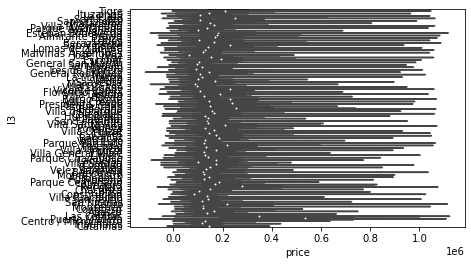

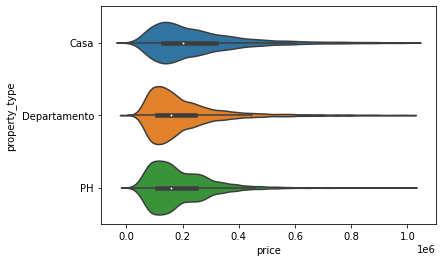

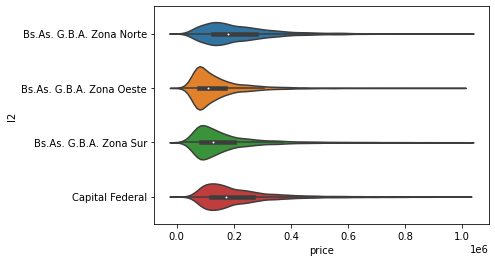

In [29]:
# violinplot: para las columnas categoricas que nos interesa analizar 

few_cat_variables = ['l3', 'property_type', 'l2']

#Ploteamos las indicadas
for i in range(len(few_cat_variables)):
    sns.violinplot(y=few_cat_variables[i], x='price', data=df)
    plt.show()

In [30]:
del(df['title'])

In [31]:
del(df['l3']) #Ya que no lo vamos a encodear! 

In [32]:
df.head()

,l2,price,property_type,Datos_Reescalados,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R
137,Bs.As. G.B.A. Zona Norte,219000.0,Casa,-0.204094,-0.079608,0.573044,-0.032344,0.034482
138,Bs.As. G.B.A. Zona Oeste,110000.0,Casa,1.055179,0.092215,-0.661412,-0.032344,0.034482
252,Bs.As. G.B.A. Zona Sur,120000.0,Casa,1.259889,3.762986,0.573044,2.975885,0.944297
253,Bs.As. G.B.A. Zona Sur,650000.0,Casa,5.589802,4.309697,1.807499,2.975885,0.944297
254,Bs.As. G.B.A. Zona Norte,370000.0,Casa,5.447126,1.654246,1.807499,2.223827,0.944297


In [109]:
#Probamos nuestro modelo anterior sin realizar encoding y luego lo volvemos a probar realizandolo. Vimos que mejoró

In [ ]:
#Entonces, si bien en el gráfico no podemos establecer una clara relación entre el tipo de propiedad y el precio, o el tipo de barrio, al probar los
#modelos, vimos que relizar encoding suma para mejorar la performance. 

In [33]:
important_categorical_vars = ['property_type', 'l2']

# Let us once again categories of these important variables
for col in important_categorical_vars:
    print(col, ": ", df[col].unique())
    

property_type :  ['Casa' 'Departamento' 'PH']
l2 :  ['Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Oeste'
 'Bs.As. G.B.A. Zona Sur' 'Capital Federal']


In [34]:
encoded_columns = pd.get_dummies(df[['property_type', 'l2']]) #Armo una columa con numeros solamente entre prop.type

In [35]:
df = df.join(encoded_columns).drop('property_type', axis=1) #Agrego las columnas numericas al dataset

In [36]:
df.drop('l2', axis=1, inplace=True)

In [37]:
df.head()

,price,Datos_Reescalados,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R,property_type_Casa,property_type_Departamento,property_type_PH,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
137,219000.0,-0.204094,-0.079608,0.573044,-0.032344,0.034482,1,0,0,1,0,0,0
138,110000.0,1.055179,0.092215,-0.661412,-0.032344,0.034482,1,0,0,0,1,0,0
252,120000.0,1.259889,3.762986,0.573044,2.975885,0.944297,1,0,0,0,0,1,0
253,650000.0,5.589802,4.309697,1.807499,2.975885,0.944297,1,0,0,0,0,1,0
254,370000.0,5.447126,1.654246,1.807499,2.223827,0.944297,1,0,0,1,0,0,0


In [38]:
df.rename(columns={'Datos_Reescalados':'surface_total_R'}, inplace=True)

In [67]:
df.corr()

,price,surface_total_R,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R,property_type_Casa,property_type_Departamento,property_type_PH,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
price,1.000000,0.311441,0.544441,0.637059,0.526375,0.492754,0.110305,-0.056573,-0.047602,0.037029,-0.135380,-0.092552,0.110516
surface_total_R,0.311441,1.000000,0.696821,0.371048,0.487405,0.446997,0.551010,-0.456488,0.009666,0.182907,0.076360,0.132824,-0.272673
surface_covered_R,0.544441,0.696821,1.000000,0.530921,0.653887,0.617738,0.452926,-0.408634,0.055482,0.109291,0.048689,0.085209,-0.168526
bathrooms_R,0.637059,0.371048,0.530921,1.000000,0.585076,0.557310,0.237105,-0.176208,-0.024620,0.112822,-0.031528,-0.003350,-0.066768
rooms_R,0.526375,0.487405,0.653887,0.585076,1.000000,0.867432,0.424900,-0.433501,0.123420,0.046003,0.040173,0.111896,-0.132052
bedrooms_R,0.492754,0.446997,0.617738,0.557310,0.867432,1.000000,0.337554,-0.373787,0.139887,0.047093,0.050374,-0.029451,-0.046469
property_type_Casa,0.110305,0.551010,0.452926,0.237105,0.424900,0.337554,1.000000,-0.718191,-0.139372,0.140730,0.225234,0.312296,-0.443844
property_type_Departamento,-0.056573,-0.456488,-0.408634,-0.176208,-0.433501,-0.373787,-0.718191,1.000000,-0.588959,-0.079800,-0.202667,-0.244096,0.339029
property_type_PH,-0.047602,0.009666,0.055482,-0.024620,0.123420,0.139887,-0.139372,-0.588959,1.000000,-0.049884,0.026822,-0.015338,0.033022
l2_Bs.As. G.B.A. Zona Norte,0.037029,0.182907,0.109291,0.112822,0.046003,0.047093,0.140730,-0.079800,-0.049884,1.000000,-0.136036,-0.157317,-0.591765


### Probamos los modelos del primer proyecto

In [39]:
X = df.drop(['price'], axis = 1) #Vamos a usar nuestras variables nuevas!
y = df['price'] #Para predecir el precio, este sería mi target

In [40]:
from sklearn.model_selection import train_test_split
trainSize = 0.7

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                  train_size=trainSize)

In [41]:
#Lo probamos en nuestro benchmark


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train) #Lo entrenamos sobre datos de testeo

y_train_pred = lin_reg.predict(X_train) #Predecimos sobre train
y_test_pred = lin_reg.predict(X_test) #Predecimos sobre test

from sklearn.metrics import mean_squared_error
reg_lineal_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
reg_lineal_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {reg_lineal_rmse_train}')  #Calculamos el error para train
print(f'Raíz del error cuadrático medio en Test: {reg_lineal_rmse_test}')   #Calculamos el error para test
#En general, MSE y RMSE son más sensibles a valores atípicos, lo que aplica perfecto en este caso!
# Elegimos esta métrica!

'''
En el modelo anterior habiamos obtenido los siguientes resultados:
Raíz del error cuadrático medio en Train: 218574.3883784279
Raíz del error cuadrático medio en Test: 214586.46146717411
'''

Raíz del error cuadrático medio en Train: 102202.57899474993
Raíz del error cuadrático medio en Test: 102108.6539512681


'\nEn el modelo anterior habiamos obtenido los siguientes resultados:\nRaíz del error cuadrático medio en Train: 218574.3883784279\nRaíz del error cuadrático medio en Test: 214586.46146717411\n'

In [ ]:
#Mejoró más de USD 100.000! 

In [71]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt

knn_final_model = KNeighborsRegressor(n_neighbors=3) #Lo creo
knn_final_model.fit(X_train, y_train) #Lo entreno
#Predict
y_train_pred = knn_final_model.predict(X_train)
y_test_pred = knn_final_model.predict(X_test)

#En general, MSE y RMSE son más sensibles a valores atípicos
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

'''
En el modelo anterior
Raíz del error cuadrático medio en Train: 118837.21901183763
Raíz del error cuadrático medio en Test: 150101.88668834913
'''

Raíz del error cuadrático medio en Train: 63785.20428875642
Raíz del error cuadrático medio en Test: 79553.43661686665


'\nEn el modelo anterior\nRaíz del error cuadrático medio en Train: 118837.21901183763\nRaíz del error cuadrático medio en Test: 150101.88668834913\n'

In [118]:
#Mejoró USD 55.052,00 en el train
#Mejoró USD 70.548 en el test 

#Mejoró aprox. un 50% (exactamente 47%) el modelo!

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_final_model = DecisionTreeRegressor(random_state=0, max_depth = 12)
#Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 0.8)
#Fit
tree_final_model.fit(X_train, y_train)
#Predict
y_train_pred = tree_final_model.predict(X_train)
y_test_pred = tree_final_model.predict(X_test)

In [43]:
#En general, MSE y RMSE son más sensibles a valores atípicos
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

'''
OBS! ESPECIAL ATENCION ACÁ
EN EL ANTERIOR:
Raíz del error cuadrático medio en Train: 126823.9026648094
Raíz del error cuadrático medio en Test: 155269.22191378637
'''

Raíz del error cuadrático medio en Train: 71843.39881711052
Raíz del error cuadrático medio en Test: 80595.17383197996


'\nOBS! ESPECIAL ATENCION ACÁ\nEN EL ANTERIOR:\nRaíz del error cuadrático medio en Train: 126823.9026648094\nRaíz del error cuadrático medio en Test: 155269.22191378637\n'

In [119]:
#El test mejoró USD 74.674,00
#Eso es un 48% aproximadamente!

##### Estamos bastante conformes con los resultados logrados hasta el momento!
##### Los errores disminuyeron en muy grandes porcentajes (Aproximadamente 50% en todos los modelos)

##### Creemos que esto se debe al correcto trabajo con los valores faltantes (la correcta imputación) en lugar de descartarlos como habiamos hecho en el primer proyecto. Le atribuímos especial importancia al trabajo con los outliers también, ya que fueron claves para poder aumentar la correlación entre las superficies y el precio, lo que en nuestra experiencia con el dataset resultó clave, ya que logramos que nuestras variables predictoras sean más relevantes en relación a la variable a predecir. 
##### Por último, probamos los modelos sin realizar el encoding y nuevamente realizandolo, y logramos continuar con la disminución del error, por lo que dejamos los cambios aplicados. 
##### Algo similar ocurrió con el escalado de datos, al estandarizar las variables numéricas de nuestro dataset, no solo no cambiamos la forma de la distribución sino que alimentamos a nuestros modelos de variables comparables


## Parte B

Podemos elegir dos modelos avanzados. 
Luego de analizarlo, elegimos hacer un modelo de boosting y otro de bagging (ambos de ensamble).

Teniendo en cuenta que los modelos de ensamble son una técnica que consiste en combinar la predicción de muchos modelos con el fin de llegar a una predicción final más óptima que la que hubieras obtenido con los modelos individualmente. En ambos casos, la predicción final se hace votando.
Sin embargo...

Boosting es una técnica que trabaja entrenando modelos de manera iterativa en base a los errores del modelo anterior. Es decir, cada modelo ya no es independiente, sino que  el ensamble se compone de una suma de modelos débiles, cada uno con un peso asociado. Entonces, el objetivo es encontrar esos modelos débiles y sus pesos.

Bagging, en cambio, es un método que consiste en tomar grupos de muestras al azar de nuestro set de entrenamiento con reemplazo. Si bien puede ser aplicado sobre cualquier conjunto de modelos, independientemente de cómo hayan sido entrenados, la mayor ganancia está cuando estos modelos están sobreajustados.

Vamos a probar estos modelos, en primer lugar entrenandolos con sus hiperparámetros por default y luego buscaremos optimizarlos.


##### Boosting 
Para comenzar haremos un AdaBoost para ver a gran escala como se comporta el modelo. Sabemos que no tiene muchos hiperparametros.
Seguiremos realizando un XG BOOST ya que sabemos que es un modelo que permite gran accuracy, es flexible y fundamentalmente (lo que más nos interesa) es un modelo que funciona bien en la regresión. 

##### Bagging 
Crearemos un modelo Random Forest ya que es un buen modelo para tener de referencia, es eficiente en datasets grandes y es efectivo. 


In [44]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import sklearn.metrics as metrics

from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

In [45]:
X = df.drop(['price'], axis=1)
y = df['price']

# Separamos los datos en train y test (held-out) - Utilice un 30% del dataset como test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
'''
Primero vamos a probar modelos de Boosting
'''

In [46]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=250)
# Entrenamos el modelo
ada_clf.fit(X_train, y_train)

y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')



Raíz del error cuadrático medio en Train: 120906.68356454525
Raíz del error cuadrático medio en Test: 120554.04162130484


In [156]:
#Errores "grandes" con este modelo. Era como para tener una idea... Vemos que este modelo no tiene muchos hiperparametros para probar... 

#Seguimos probando modelos e incorporamos optimizacion de parametros mediante Random y Grid Search

In [64]:
model_1_base = GradientBoostingRegressor() #Armo el modelo base de XGBoost 

In [65]:
model_1_base.fit(X_train, y_train)

GradientBoostingRegressor()

In [66]:
#Predecimos en los datos de test y train
prediction_model_1_base_test = model_1_base.predict(X_test)
prediction_model_1_base_train = model_1_base.predict(X_train)

#Evaluamos usando la métrica de error elegida

rmse_test_1_base = sqrt(mean_squared_error(y_test, prediction_model_1_base_test))
rmse_train_1_base = sqrt(mean_squared_error(y_train, prediction_model_1_base_train))
print(f'Raíz del error cuadrático medio en Test: {rmse_test_1_base}')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_1_base}')

Raíz del error cuadrático medio en Test: 85530.19317509177
Raíz del error cuadrático medio en Train: 84291.82177045112


In [ ]:
#Acá ya notamos como bajamos el error directamente con este modelo avanzado, sin siquiera intervenir con sus hiperparametros. Ahora trataremos de hacerlo

In [47]:
model_1 = GradientBoostingRegressor(n_estimators=100) #Armo el arbol

#RANDOM SEARCH VAMOS A HACER. 
param_dist = {'max_depth':sp.stats.randint(1, 30), 
              'min_samples_split':sp.stats.randint(1, 5),
              'min_samples_leaf':sp.stats.randint(1, 5)}


#Elegimos rangos grandes ya que se trata de un random search y queremos ver como se comporta...

In [48]:
%%time
# ESTRATEGIA 2: Random Search
model1 = RandomizedSearchCV(model_1, param_dist, random_state=0, cv=5)

# Entrenamos: con la grilla definida arriba y CV con tamaño de Fold=5
model1.fit(X_train, y_train)

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_gb.py", line 211, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Usuario\miniconda3\envs\datascience\l

Wall time: 13min 54s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000292CC6A3D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000029286F7BE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000029293A6CA0>},
                   random_state=0)

In [49]:
print("Mejores parametros: "+str(model1.best_params_))

Mejores parametros: {'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [50]:
#Predecimos en los datos de test y train
prediction_model_1_test = model1.predict(X_test)
prediction_model_1_train = model1.predict(X_train)

#Evaluamos la nueva predicción. 

rmse_test_1 = sqrt(mean_squared_error(y_test, prediction_model_1_test))
rmse_train_1 = sqrt(mean_squared_error(y_train, prediction_model_1_train))
print(f'Raíz del error cuadrático medio en Test: {rmse_test_1}')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_1}')

Raíz del error cuadrático medio en Test: 72157.03869938057
Raíz del error cuadrático medio en Train: 54390.73739944368


In [ ]:
#Buenos resultados y buena optimización! Vemos que es un modelo que performa bastante bien... 
#Notamos que gracias a la optimización que hicimos mediante random search (con Cross Validation 5 folds) logramos disminuít el error al rededor de un 15%!

In [ ]:
#Ahora probamos con bagging... Elegimos random forest
#Nuevamente, armamos un modeo base sin optimizar, el cual luego buscaremos optimizar con los hiperparametros, lo hacemos simplemente para tener una idea general

In [84]:
model_2_base = RandomForestRegressor()
model_2_base.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
y_train_model_2_base = model_2_base.predict(X_train)
y_test_model_2_base = model_2_base.predict(X_test)

rmse_train_2_base = sqrt(mean_squared_error(y_train, y_train_model_2_base))
rmse_test_2_base = sqrt(mean_squared_error(y_test, y_test_model_2_base))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_2_base}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_2_base}')

Raíz del error cuadrático medio en Train: 47931.76768206095
Raíz del error cuadrático medio en Test: 71057.2768922654


In [ ]:
#Performa muy bien desde un principio, buscaremos optimizarlo

In [53]:
model_2 = RandomForestRegressor(n_estimators=300, n_jobs = -1) #Armo el arbol 


param_grid = {'max_depth': [22,24,25],   
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,5],} 
'''
Primero hicimos algunos random forest para tener una idea de los hiperparámetros que mejor funcionaban... Luego hicimos un grid search con algunos de estos parametros.

param_2 = {'max_depth':sp.stats.randint(1, 30), 
              'min_samples_split':sp.stats.randint(1, 5),
              'min_samples_leaf':sp.stats.randint(1, 5)}
'''

"\nPrimero hicimos algunos random forest para tener una idea de los hiperparámetros que mejor funcionaban... Luego hicimos un grid search con algunos de estos parametros.\n\nparam_2 = {'max_depth':sp.stats.randint(1, 30), \n              'min_samples_split':sp.stats.randint(1, 5),\n              'min_samples_leaf':sp.stats.randint(1, 5)}\n"

In [54]:
%%time
'''
model2_t = RandomizedSearchCV(model_2, param_2, random_state=0, cv=5)
'''
# Grid Search
model2 = GridSearchCV(model_2, param_grid=param_grid, cv=5)

# Entrenamos: tree con la grilla definida arriba y CV con tamaño de Fold=5

model2.fit(X_train, y_train)
'''
model2_t.fit(X_train, y_train)
'''

Wall time: 59min 45s


'\nmodel2_t.fit(X_train, y_train)\n'

In [55]:
print("Mejores parametros: "+str(model2.best_params_)) #Me da el mejor parametro


#scores = pd.DataFrame(model2_t.cv_results_) #Hago un dataframe con todo lo que tenia (de la grid) en forma de dict
#scores

Mejores parametros: {'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [56]:
#Predecimos en los datos 
pred_train_2 = model2.predict(X_train)
pred_test_2 = model2.predict(X_test)

'''
pred_train_2t = model2_t.predict(X_train)
pred_test_2t = model2_t.predict(X_test)
'''

'\npred_train_2t = model2_t.predict(X_train)\npred_test_2t = model2_t.predict(X_test)\n'

In [57]:
rmse_test_2 = sqrt(mean_squared_error(y_test, pred_test_2))
rmse_train_2 = sqrt(mean_squared_error(y_train, pred_train_2))
print(f'Raíz del error cuadrático medio en Test: {rmse_test_2}')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_2}')

'''
rmse_test_2t = sqrt(mean_squared_error(y_test, pred_test_2t))
rmse_train_2t = sqrt(mean_squared_error(y_train, pred_train_2t))
print(f'Raíz del error cuadrático medio en Test: {rmse_test_2t}')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_2t}')
'''

#Logramos bajar el error en el TEST que era lo que realmente nos importaba! Pero bajó MUY poco! Casi imperceptible... Ver que no hay muchas maneras de optimizarlo
#Realizamos varias pruebas y generalmente ronda por el mismo error.
#Destacamos que con la optimización pudimos disminuir la diferencia entre train y test y además bajar el error (poco) del test. 

Raíz del error cuadrático medio en Test: 70929.1959928595
Raíz del error cuadrático medio en Train: 48830.98621501203


"\nrmse_test_2t = sqrt(mean_squared_error(y_test, pred_test_2t))\nrmse_train_2t = sqrt(mean_squared_error(y_train, pred_train_2t))\nprint(f'Raíz del error cuadrático medio en Test: {rmse_test_2t}')\nprint(f'Raíz del error cuadrático medio en Train: {rmse_train_2t}')\n"

# Los errores más bajos a los que llegamos hasta ahora!

Conclusiones Parte B:

Teniendo en cuenta los resultados, vemos que RANDOM FOREST presenta errores muy bajos desde el principio y con sus parátros originales, con lo cual es bastante útil. Así mismo, si bien los errores de XG BOOST no son tan bajos, vemos que son más similares en el train y en el test.

Por otro lado, y en comparación con los modelos de la parte A, vemos que logramos bajar aproximadamente 10.000USD tanto en el train como en el test en ambos modelos. Teniendo en cuenta esto y agregando que al momento de realizar los primeros modelos (PROYECTO I) estuvimos una gran cantidad de tiempo intentando buscar hiperparametros, realizando for loops y demás, notamos que estos modelos avanzados son mucho mejores predictores.

En cuanto al ADA BOOST, lo descartamos desde un principio ya que notamos que no performa muy bien. 


## Parte C

In [121]:
df.corr()

,price,surface_total_R,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R,property_type_Casa,property_type_Departamento,property_type_PH,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
price,1.000000,0.311441,0.544441,0.637059,0.526375,0.492754,0.110305,-0.056573,-0.047602,0.037029,-0.135380,-0.092552,0.110516
surface_total_R,0.311441,1.000000,0.696821,0.371048,0.487405,0.446997,0.551010,-0.456488,0.009666,0.182907,0.076360,0.132824,-0.272673
surface_covered_R,0.544441,0.696821,1.000000,0.530921,0.653887,0.617738,0.452926,-0.408634,0.055482,0.109291,0.048689,0.085209,-0.168526
bathrooms_R,0.637059,0.371048,0.530921,1.000000,0.585076,0.557310,0.237105,-0.176208,-0.024620,0.112822,-0.031528,-0.003350,-0.066768
rooms_R,0.526375,0.487405,0.653887,0.585076,1.000000,0.867432,0.424900,-0.433501,0.123420,0.046003,0.040173,0.111896,-0.132052
bedrooms_R,0.492754,0.446997,0.617738,0.557310,0.867432,1.000000,0.337554,-0.373787,0.139887,0.047093,0.050374,-0.029451,-0.046469
property_type_Casa,0.110305,0.551010,0.452926,0.237105,0.424900,0.337554,1.000000,-0.718191,-0.139372,0.140730,0.225234,0.312296,-0.443844
property_type_Departamento,-0.056573,-0.456488,-0.408634,-0.176208,-0.433501,-0.373787,-0.718191,1.000000,-0.588959,-0.079800,-0.202667,-0.244096,0.339029
property_type_PH,-0.047602,0.009666,0.055482,-0.024620,0.123420,0.139887,-0.139372,-0.588959,1.000000,-0.049884,0.026822,-0.015338,0.033022
l2_Bs.As. G.B.A. Zona Norte,0.037029,0.182907,0.109291,0.112822,0.046003,0.047093,0.140730,-0.079800,-0.049884,1.000000,-0.136036,-0.157317,-0.591765


Primero vamos a analizar las distintas variables predictoras,
Veremos las variables importantes (y las que no...)
Luego, vamos a probar los distintos modelos eliminando algunas variables y viendo como se comportan. Repetiremos el proceso varias veces y luego analizaremos las conclusiones. 

In [112]:
list(df.columns) #Listamos las columnas 

['price',
 'surface_total_R',
 'surface_covered_R',
 'bathrooms_R',
 'rooms_R',
 'bedrooms_R',
 'property_type_Casa',
 'property_type_Departamento',
 'property_type_PH',
 'l2_Bs.As. G.B.A. Zona Norte',
 'l2_Bs.As. G.B.A. Zona Oeste',
 'l2_Bs.As. G.B.A. Zona Sur',
 'l2_Capital Federal']

In [114]:
lista_columnas = ['surface_total_R', 'surface_covered_R', 'bathrooms_R', 'rooms_R', 'bedrooms_R', 'property_type_Casa', 'property_type_Departamento', 'property_type_PH', 'l2_Bs.As. G.B.A. Zona Norte', 'l2_Bs.As. G.B.A. Zona Oeste', 'l2_Bs.As. G.B.A. Zona Sur', 'l2_Capital Federal' ]
i = -1 # La iniciamos en cero

for elemento in lista_columnas:    
    i = i+1 # Le sumamos 1 cada vez que entra
    print(elemento, i)
    
#Vemos con qué numero van a aparecer en nuestro gráfico 

surface_total_R 0
surface_covered_R 1
bathrooms_R 2
rooms_R 3
bedrooms_R 4
property_type_Casa 5
property_type_Departamento 6
property_type_PH 7
l2_Bs.As. G.B.A. Zona Norte 8
l2_Bs.As. G.B.A. Zona Oeste 9
l2_Bs.As. G.B.A. Zona Sur 10
l2_Capital Federal 11


In [100]:
#Vemos la importancia de las features en Ada boost

print(ada_clf.feature_importances_)

[0.01752046 0.43716221 0.3971919  0.01729299 0.         0.
 0.06013832 0.         0.         0.04305801 0.         0.0276361 ]


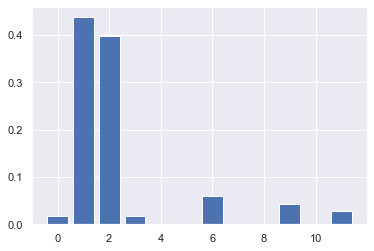

<BarContainer object of 12 artists>

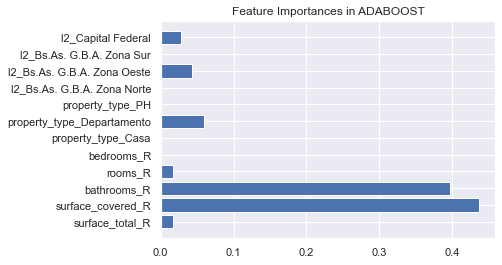

In [125]:
import matplotlib.pyplot as plt

# plot
plt.bar(range(len(ada_clf.feature_importances_)), ada_clf.feature_importances_)
plt.show()
plt.title('Feature Importances in ADABOOST')

plt.barh(lista_columnas, ada_clf.feature_importances_)

In [131]:
#Las más importantes son surface_covered y bathrooms
#Tiene sentido que no sean importantes todas las variables de property type y de L2, ya que como son dummy, es lógico que esto suceda
#vemos, entonces, que si agrupamos los tipos de propiedad y Los barrios, la variable menos importante es bedrooms
#No le da mucha importancia a superficie total ni a rooms...

In [ ]:
#Vamos a ver la importancia de las features en el modelo XGBOOST 

In [102]:
#Vemos la importancia de las features
print(model_1_base.feature_importances_)

[0.04084029 0.2861332  0.48132531 0.01657547 0.01113691 0.00258844
 0.08872805 0.00365331 0.00560679 0.00490503 0.00184765 0.05665956]


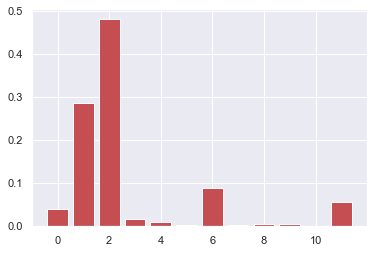

Text(0.5, 1.0, 'Feature Importances in XGBOOST')

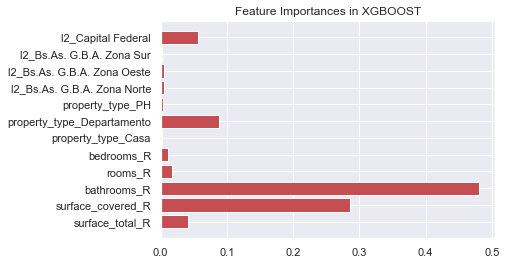

In [127]:
import matplotlib.pyplot as plt

# plot
plt.bar(range(len(model_1_base.feature_importances_)), model_1_base.feature_importances_, color = 'r')
plt.show()

plt.barh(lista_columnas, model_1_base.feature_importances_, color = 'r')
plt.title('Feature Importances in XGBOOST')

In [128]:
#Las variables más importantes son BAÑOS y superficie cubiera
#Las menos importantes son 'property_type_Casa' y 'property_type_PH', seguidas de  'l2_Bs.As. G.B.A. Zona Norte' y 'l2_Bs.As. G.B.A. Zona Oeste' (tiene sentido porque son variables dummy)
#Si agrupamos las zonas de L2 y los tipos de propiedad, vemos que las variables menos relevantes son rooms y bedrooms

In [107]:
#Vamos a ver la importancia de las features en el random forest

print(model_2_base.feature_importances_)

[0.12984727 0.23043833 0.45516466 0.03342305 0.03077634 0.00370056
 0.06047327 0.00345588 0.00834299 0.0039734  0.00370398 0.03670027]


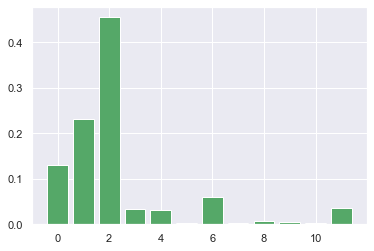

Text(0.5, 1.0, 'Feature Importances in Random Forest')

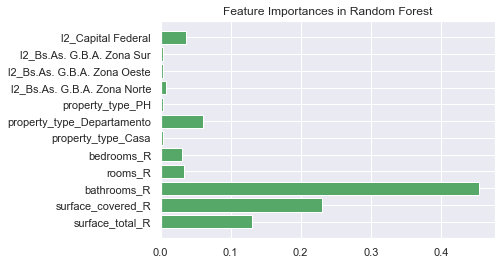

In [130]:
# plot
plt.bar(range(len(model_2_base.feature_importances_)), model_2_base.feature_importances_, color = 'g')
plt.show()

plt.barh(lista_columnas, model_2_base.feature_importances_, color = 'g')
plt.title('Feature Importances in Random Forest')

In [ ]:
#AL igual que en XGBOOST, las mejores variables predictoras coinciden con bathrooms y surface_covered. 
#Las poco relevantes son 'rooms_R' and 'bedrooms_R', ya que si bien algunas zonas de L2 y algunos tipos de propiedad son poco "importantes" según el gráfico, debemos tener
#en cuenta que se trata de variables dummy
#Destacamos que este modelo le da mas importancia a la variable 'surface_total_R' que los anteriores.

Vamos a probar con distintos modelos para ver si esto se cumple... 

In [117]:
#Armamos distintos árboles para ver como se comportan...
X = df.drop(['price'], axis=1) 
y = df['price']

# Separamos los datos en train y test (held-out) - Utilice un 30% del dataset como test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [156]:
tree_ex = DecisionTreeRegressor(max_depth = 10, min_samples_split= 4)  #Fuimos variando los distintos hiperparametros...
 
tree_ex.fit(X_train, y_train)

#Predecimos en los datos de test y train
prediction_tree_test =tree_ex.predict(X_test)
prediction_tree_train = tree_ex.predict(X_train)

#Evaluamos usando la métrica de error elegida

rmse_test_ex = sqrt(mean_squared_error(y_test, prediction_tree_test))
rmse_train_ex= sqrt(mean_squared_error(y_train, prediction_tree_train))
print(f'Raíz del error cuadrático medio en Test: {rmse_test_ex}')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_ex}')

Raíz del error cuadrático medio en Test: 82843.11165324038
Raíz del error cuadrático medio en Train: 77648.67782684235


Text(0.5, 1.0, 'Feature Importances in Trees')

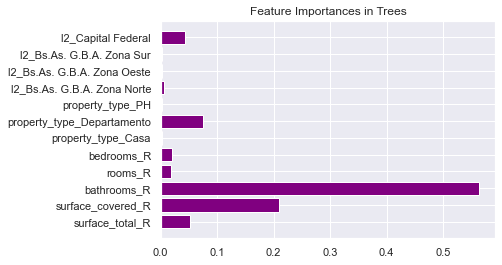

In [157]:
# plot
plt.barh(lista_columnas, tree_ex.feature_importances_, color = 'purple')
plt.title('Feature Importances in Trees')

In [145]:
#Al ir probando los distintos árboles, notamos que los arboles mas simples (con menos profundidad) solo le dan importancia a los baños y la superficie cubierta.
#A medida que el árbol se complejiza, aumenta la imortancia por otras variables como por ejemplo la superficie total, tipos de propiedad y barrio. 
#Cuanto más importancia a la superficie total le da el modelo, mas preciso logra ser (obs!) sin embargo llega un momento que esto se estanca y por mas de que se aumente la profundidad del árbol, los features siguen manteniendo igual importancia, no disminuye ni aumenta el error en test, solo overfittea. 

In [169]:
#Vamos a probar cambiando las variables utilizadas para predecir, y vamos a ver que ocurre al hacerlo en los distintos modelos...

X = df.drop(['price', 'rooms_R', 'bedrooms_R'], axis=1) #probamos drop(['l2_R']) drop('rooms_R', 'bedrooms_R') drop('property_type_R'), entre otros.
y = df['price']

# Separamos los datos en train y test (held-out) - Utilice un 30% del dataset como test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [170]:
model_p = GradientBoostingRegressor()

In [171]:
model_p.fit(X_train, y_train)

#Predecimos en los datos de test y train
prediction_model_p_test = model_p.predict(X_test)
prediction_model_p_train = model_p.predict(X_train)

#Evaluamos usando la métrica de error elegida

rmse_test_p = sqrt(mean_squared_error(y_test, prediction_model_p_test))
rmse_train_p= sqrt(mean_squared_error(y_train, prediction_model_p_train))
print(f'Raíz del error cuadrático medio en Test: {rmse_test_p}')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_p}')

Raíz del error cuadrático medio en Test: 88239.17612467214
Raíz del error cuadrático medio en Train: 86936.65412746277


In [172]:
model_pp = RandomForestRegressor()
model_pp.fit(X_train, y_train)

RandomForestRegressor()

In [173]:
y_train_model_pp = model_pp.predict(X_train)
y_test_model_pp = model_pp.predict(X_test)

rmse_train_pp = sqrt(mean_squared_error(y_train, y_train_model_pp))
rmse_test_pp = sqrt(mean_squared_error(y_test, y_test_model_pp))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_pp}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_pp}')

Raíz del error cuadrático medio en Train: 57728.93376433631
Raíz del error cuadrático medio en Test: 77688.46260965736


Por otro lado, vamos a graficar los errores de los nuevos modelos (Parte B) y vamos a ver como se comportan los mismos...

Random Forest


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


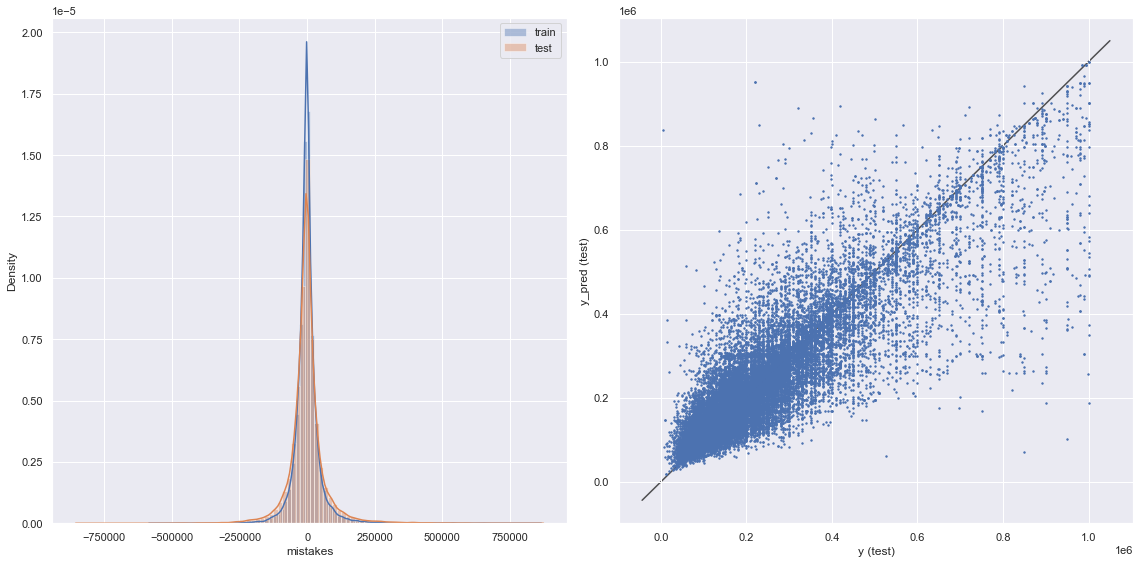

In [58]:
print("Random Forest")

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.distplot(y_train - pred_train_2, bins = 100, label = 'train')
sns.distplot(y_test - pred_test_2, bins = 100, label = 'test')
plt.xlabel('mistakes')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,pred_test_2, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

Gradient Boosting


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


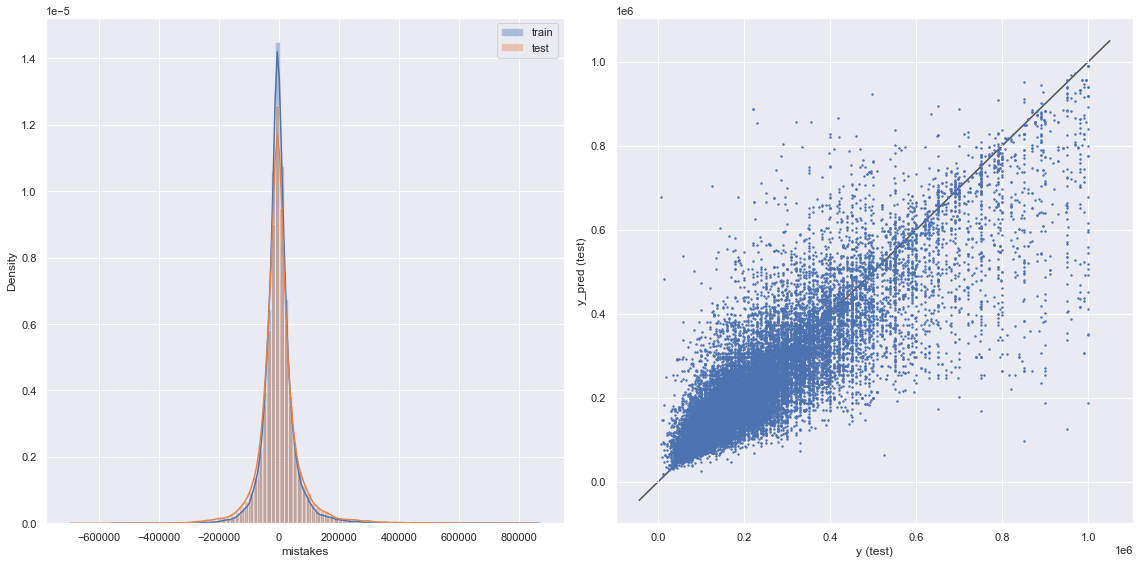

In [52]:
print("Gradient Boosting")

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.distplot(y_train - prediction_model_1_train, bins = 100, label = 'train')
sns.distplot(y_test - prediction_model_1_test, bins = 100, label = 'test')
plt.xlabel('mistakes')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,prediction_model_1_test, s =2)

'''
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
'''
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

#### Conclusiones:
En primer lugar, vimos la importancia de los features en los modelos avanzados...
En los tres modelos coincide que los más importantes son 'bathrooms' y 'surface_covered'
Así mismo, coincide con que 'rooms' y 'bedrooms' tienen poca importancia. 

Luego, estuvimos probando varios arboles de regresión y notamos que cuando menos profundidad tienen, mas simples son y más concentran su importancia en 'bathrooms' y 'surface_covered'. A medida que se complejizan, van aumentando la importancia de otros features como puede ocurrir en el caso de 'surface_total', barrios de 'L2' o incluso 'Departamento' en el tipo de propiedad.
Destacamos que asi mismo, llega un momento que este crecimiento se detiene y el modelo ya comienza a overfittear (por ejemplo en profundidades mayores a 30)


Realizamos pruebas para ver las variables importantes en nuestros modelos y analizamos el modelo para ver su error al modificar sus variables, con el objetivo de ver el impacto que tiene realmente.

Logramos notar que eliminando las variables predictoras "bathrooms" y "surface covered" el error sube USD 10.000 en XG BOOST y USD 16.000 en random forest, es un montón! 
En principio, concluímos en que ambas son muy buenas variables predictoras, lo que coincide con lo visto "teoricamente" en el punto anterior.
Así mismo, continuamos investigando y al probar eliminando "rooms" y "bedrooms" (ambas a la vez) los errores no aumentaban tanto (aprox USD 3.000 en Boosting y USD 6.000 en Bagging) con lo que no las podemos considerar variables muy relevantes a la hora de predecir, aunque sin embargo no podemos restarles toda la importancia. 

Continuamos intentando y eliminando completamente la variable L2 vemos que el error sube aproximadamente USD 5.000 (en Boosting) y lo mismo ocurre cuando eliminamos "property type". Esto, entonces, nos indica que discriminar por tipo de propiedad y por barrio, es más relevante que tener las variables 'Rooms'y 'bathrooms'...

Llegamos a la conclusión, entonces, de que baños y superficies son las mejores variables para predecir que tenemos, y además poder contar con "L2" (el barrio) y con el tipo de propiedad, ayudan ambas para que este error reduzca considerablemente. Esto ya lo habiamos notado al momento de realizar encoding y probar los modelos de la parte A (los probamos antes y despues de realizarlo). Así mismo, esto coincide bastante con lo que creíamos en un primer momento teniendo en cuenta el primer proyecto, ya que desde ese entonces considerabamos a la variable baños dentro de las mejores predictoras del precio y además con el simple trabajo realizado con las superficies en ese momento, ya habiamos logrado aumentar la relación entre estas y nuestra variable target. Sin embargo, en lo personal, consideraba que si lograba incluír las variables L2 o property type estas iban a ser de suma importancia, que si bien son importantes, no lo son tanto como creí en una primera instancia. 

Por último, es el conjunto de todas las variables lo que nos ayuda a tener el error más bajo posible, y teniendo en cuenta que realizamos una limpieza importante del dataset, no nos resulta engorroso ni molesto poder usar todas las variables con las que nos quedamos. Así mismo, en el caso de Random forest, podemos notar con mayor énfasis que los errores al modificar las variables, aumentan mucho más. 

Viendo la distribución de los errores, notamos que no parece estar sesgada ni hacia la derecha ni hacia la izquierda se parecería mas a una "distribución normal". Apreciamos los picos en el centro  que indican donde se concentran los errores. Es decir, que los errores se concentran en el cero (o en torno a este). Cabe destacar que en el train, los errores son cada vez más concentrados en el cero pero ambos (tanto train como test) tienen distribuciones similares. Entonces, mis modelos captan cada vez más observaciones cuando me acerco al cero, sin embargo, el error aumenta en las viviendas mas caras. 

En lo personal, creo que el modelo se podría mejorar en un principio desde un mejor preprocesamiento, es decir, trataría de buscar una mejor y mayor correlación entre las superficies y la variable a predecir (precio). También creo que podríamos ver los outliers en bathrooms para notar si los hay y eliminarlos tratando de subir la correlación con el precio también. 
Considero que podría incorporarse la variable L3, que si bien agrandaría bastante el dataset, podría ayudarnos a que nuestras predicciones sean mas exactas ya que sería cada Barrio puntual (y sabemos que una propiedad no sale lo mismo en Palermo que en San Telmo, por ejemplo).


En cuanto a las mejoras, como mencionamos anteriormente, es importante destacar que los nuevos modelos utilizados performan mucho mejor que los anteriores desde un primer momento, es decir, sin necesidad de optimización. Vemos que desde el primer proyecto a este, nos aproximamos muchísimo más al objetivo reduciendo los errores y mejorando nuestros modelos. 

